## Problem 1

In [4]:
import numpy as np


In [15]:
v_1s = []
v_mins = []
v_rands = []
for i in range(100000):
    flips = np.random.randint(2, size = (1000, 10))
    sums = np.sum(flips, axis = 1)
    v_1 = sums[0]/10
    v_min = sums[np.argmin(sums)]/10
    v_rand = np.random.choice(sums)/10
    v_1s.append(v_1)
    v_mins.append(v_min)
    v_rands.append(v_rand)




In [17]:
np.mean(v_mins)
# B

0.03777

## Problem 2

(array([   87.,   994., 16172.,     0., 20427., 45093., 11780.,     0.,
         4329.,  1118.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

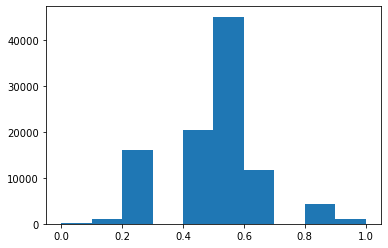

In [18]:
import matplotlib.pyplot as plt
plt.hist(v_1s)

(array([62230.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 37770.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <a list of 10 Patch objects>)

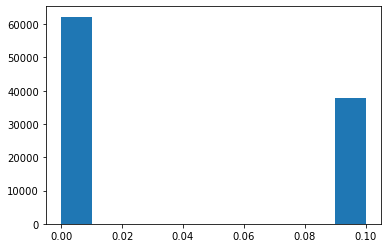

In [19]:
plt.hist(v_mins)

(array([   88.,   980., 16186.,     0., 20522., 44884., 11798.,     0.,
         4490.,  1052.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

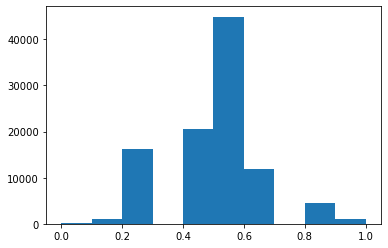

In [21]:
plt.hist(v_rands)

In [22]:
# D

## Problem 3

In [23]:
# Either wrong wrong or right right: D

## Problem 4

In [24]:
# When the mu's cancel, so when lambda = 0.5

## Problem 5

Code for the Linear Regression Algorithm

In [128]:
# Code for Creating the Data
import random
import numpy as np 
import matplotlib.pyplot as plt 

# randomly generates a point
def generate_point():
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    return (x, y)

class Data:

    def target_function(self, x):
        if x[0] * self.target_m + self.target_b > x[1]:
            return -1
        else:
            return 1    


    def __init__(self, num_points):
        p0 = generate_point()
        p1 = generate_point()
        self.target_m = (p1[1] - p0[1]) / (p1[0] - p0[0])
        self.target_b = p0[1] - self.target_m * p0[0]

        self.X = []
        self.Y = []
        for i in range(num_points):
            pt = generate_point()
            self.X.append(pt)
            self.Y.append(self.target_function(pt))

    def plot(self):
        cs = ["red" if y > 0 else "blue" for y in self.Y]
        plt.scatter([x[0] for x in self.X], [x[1] for x in self.X], c=cs)
        plt.plot((-1, 1), 
                 (-self.target_m+self.target_b, self.target_m+self.target_b))
        plt.gca().set_aspect(1)
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.title("Target function")
        plt.show()
        
class LinReg():
    def evaluate(self, p):
        return self.w[0] * 1 + self.w[1] * p[0] + self.w[2] * p[1]

    def __init__(self, dataset):
        self.w = [0, 0, 0]
        self.dataset = dataset
        
    def fit(self):
        X = np.array(self.dataset.X)
        N = X.shape[0]
        x_0 = np.ones((N, 1))
        X = np.concatenate((X, x_0), axis = 1)
        y = self.dataset.Y
        p_inverse = np.dot(np.linalg.inv(np.dot(np.transpose(X), X)) , np.transpose(X))
        self.w = np.dot(p_inverse, y)
        
    def plot(self):
        cs = ["red" if y > 0 else "blue" for y in self.dataset.Y]
        plt.scatter([x[0] for x in self.dataset.X], [x[1] for x in self.dataset.X], c=cs)
        y_left = (self.w[1] - self.w[0]) / self.w[2]
        y_right = (-self.w[1] - self.w[0]) / self.w[2]
        plt.plot((-1,1), (y_left, y_right))
        plt.gca().set_aspect(1)
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.title("Candidate function found with PLA")
        plt.show()
        

In [70]:
# Problem 5
e_in = []
for i in range(1000):
    
    d = Data(100)
    lr = LinReg(dataset = d)
    lr.fit()
    wrong = 0
    for j in range(100):
        guess = int(np.sign(lr.evaluate(d.X[j])))
        if guess != d.Y[j]:
            wrong += 1
    e_in.append(wrong/1000)


In [71]:
np.mean(e_in)
#C

0.04852700000000001

In [74]:
# Problem 6
e_out = []
for i in range(1000):
    
    d = Data(100)
    lr = LinReg(dataset = d)
    lr.fit()
    wrong = 0
    fresh_data = Data(1000)
    for j in range(1000):
        guess = int(np.sign(lr.evaluate(fresh_data.X[j])))
        if guess != fresh_data.Y[j]:
            wrong += 1
    e_out.append(wrong/1000)

In [75]:
np.mean(e_out)
# E Wow... this is bad, did not expect that!

0.503764

## Problem 7
Reimplementing PLA with weight initialization

In [78]:

class PLA:
    def evaluate(self, p):
        return int(np.sign(self.w[0]*1 + self.w[1]*p[0] + self.w[2]*p[1]))

    def __init__(self, dataset, w):
        self.w = w
        self.dataset = dataset

    def fit(self, plot_iters = False):
        self.w = np.array([0,0,0])
        num_iters = 0

        while True:
            missed = []
            for (x,y) in zip(self.dataset.X, self.dataset.Y):
                if self.evaluate(x) != y:
                    missed.append((np.array([1, x[0], x[1]]), y))
            if len(missed) > 0:
                num_iters += 1
                (x,y) = random.choice(missed)
                self.w = self.w + y * x 
                
            else: 
                if plot_iters:
                    self.plot()
                return num_iters

    def plot(self):
        cs = ["red" if y > 0 else "blue" for y in self.dataset.Y]
        plt.scatter([x[0] for x in self.dataset.X], [x[1] for x in self.dataset.X], c=cs)
        y_left = (self.w[1] - self.w[0]) / self.w[2]
        y_right = (-self.w[1] - self.w[0]) / self.w[2]
        plt.plot((-1,1), (y_left, y_right))
        plt.gca().set_aspect(1)
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.title("Candidate function found with PLA")
        plt.show()

In [83]:
s = 0
for i in range(1000):
    d = Data(10)
    lr = LinReg(dataset = d)
    lr.fit()

    pla = PLA(d, lr.w)
    s += pla.fit()
print(s/1000)

9.893


## Problem 8
Non linear transformation

We need to generate new data with a new target function. So I will redefine the NonLinData class.|

In [148]:
class NonLinData:
    def evaluate(self, p):
        return int(np.sign(p[0]**2 + p[1] **2 -0.6))
    
    def __init__(self, num_points):
        self.X = []
        self.Y = []
        for i in range(num_points):
            p = generate_point()
            y = self.evaluate(p)
            self.X.append(p)
            self.Y.append(y)
        # flip 10% of the point:
        temp = np.array(self.Y)
        self.Y = np.concatenate((temp[:900],temp[900:]* (-1)), axis = 0)
    
    def plot(self):
        cs = ["red" if y > 0 else "blue" for y in self.Y]
        plt.scatter([x[0] for x in self.X], [x[1] for x in self.X], c=cs)
        plt.gca().set_aspect(1)
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.title("Target function")
        plt.show()
        

In [153]:
e_in = []

for i in range(1000):
    d = NonLinData(1000)
    lr = LinReg(d)
    lr.fit()
    wrong = 0
    for j in range(1000):
        guess = int(np.sign(lr.evaluate(d.X[j])))
        if guess != d.Y[j]:
            wrong += 1
    e_in.append(wrong/1000)

In [154]:
np.mean(e_in)
#D

0.50148

## Problem 9

In [171]:
# Make empty numpy for feature engineering

d = NonLinData(1000)
X = d.X
new_X = np.zeros((1000, 5))
for i in range(1000):
    temp = X[i]
    new_X[i] = [temp[0], temp[1], temp[0] * temp[1], temp[0]**2, temp[1]**2]

d.X = new_X
lr = LinReg(d)
lr.fit()
lr.w
# A

array([ 0.01516206, -0.02121708,  0.10465927,  1.58005766,  1.46354279,
       -0.97321118])

In [172]:
e_out = []
for i in range(1000):
    d = NonLinData(1000)
    X = d.X
    new_X = np.zeros((1000, 5))
    for i in range(1000):
        temp = X[i]
        new_X[i] = [temp[0], temp[1], temp[0] * temp[1], temp[0]**2, temp[1]**2]

    d.X = new_X
    lr = LinReg(d)
    lr.fit()
    new_d = NonLinData(1000)
    wrong = 0
    for j in range(1000):
        guess = int(np.sign(lr.evaluate(fresh_data.X[j])))
        if guess != fresh_data.Y[j]:
            wrong += 1
    e_out.append(wrong/1000)
# i probably should have used vectorization oops
np.mean(e_out)

# D

0.48854400000000003